In [9]:
# Importing prerequisites
import numpy as np
from matplotlib import pyplot as plt
import mylibrary as ml

In [10]:
# Setting values for constants
eta_T = 4e-2    # just a typical magnetic diffusivity
t_max = 5000    # time for which to run sinmulations
z_min = -1.0    # lower side of disc
z_max = 1.0     # upper side of disc
dt = t_max/200  # time step size
dz = 0.01       # spatial step in z direction
h = 1.0           # value for normalised thickness of universe

# Case for D = -1

We proceed by setting D = -1 for the 3 seed fields from Task 1 

In [11]:
alpha = 4e-2    # constant for alpha effect
q = 1e-1         # q value
Omega = 4e-1     # constant for omega effect

# therefore, value of D is:
D = - (alpha*q*Omega*h**3)/eta_T**2
print(r'Thus, value of dynamo number D for ' + r'$\alpha = $' + str(alpha) + ', ' + r'$q = $' + str(q) + ', and ' + r'$\Omega = $' + str(Omega) + r' is')
print('D = ' + str(D))

Thus, value of dynamo number D for $\alpha = $0.04, $q = $0.1, and $\Omega = $0.4 is
D = -1.0


# Initial Conditions - I

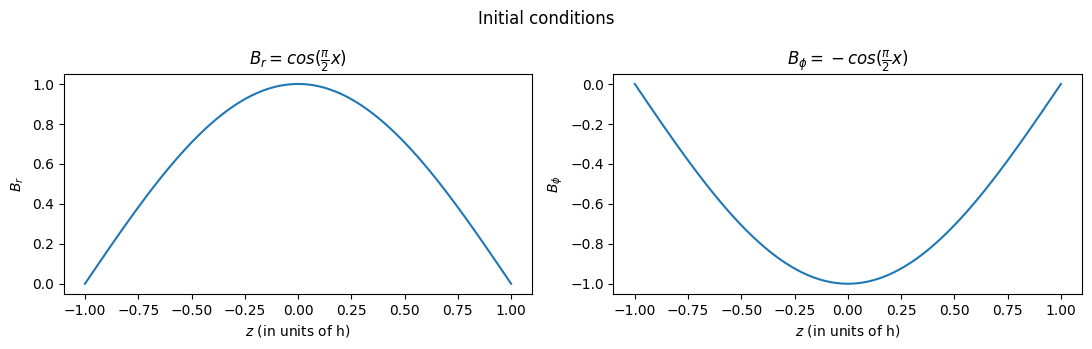

In [12]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [13]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

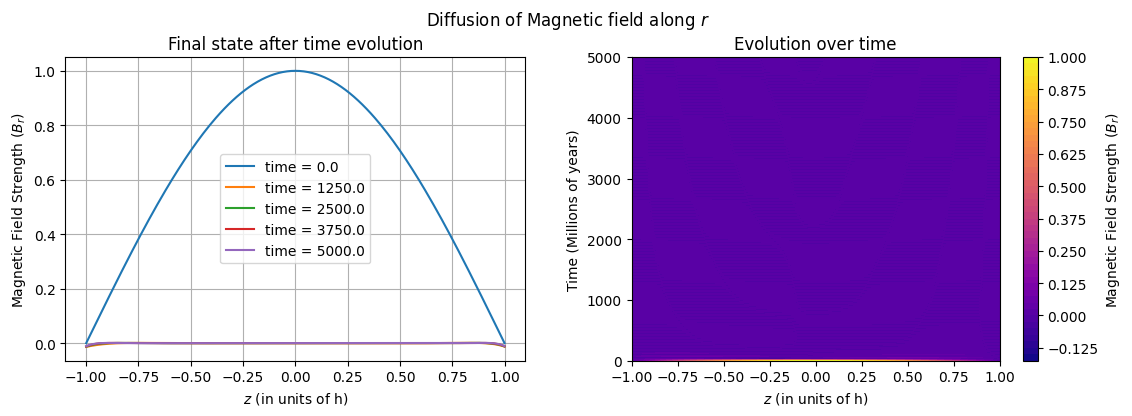

In [14]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

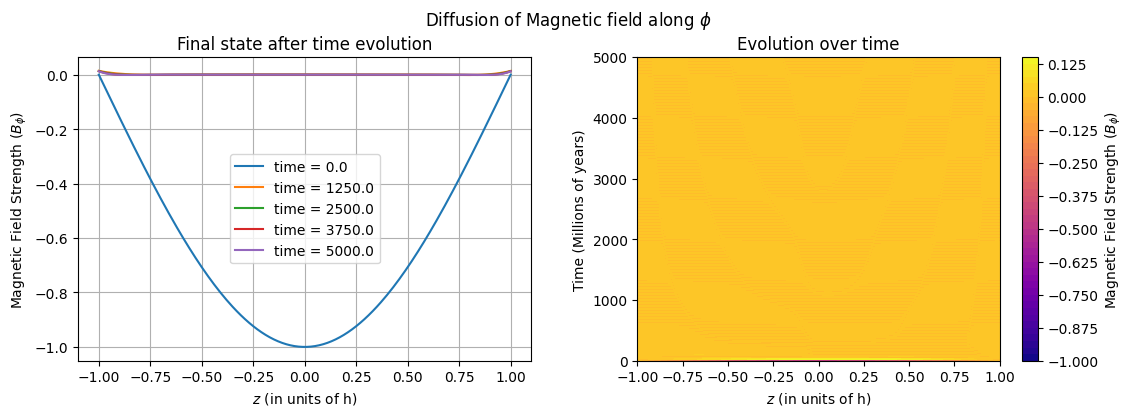

In [15]:
plt.figure(figsize=(12, 8))

# Final state plot
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Evolution plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

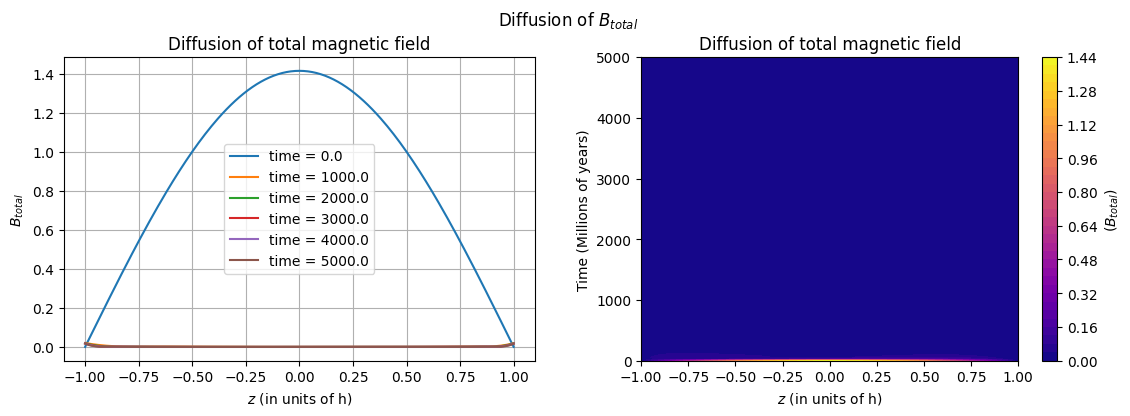

In [16]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot for total magnetic field
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Plot for pitch angle
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title('Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of ' + r'$B_{total}$')

plt.show()

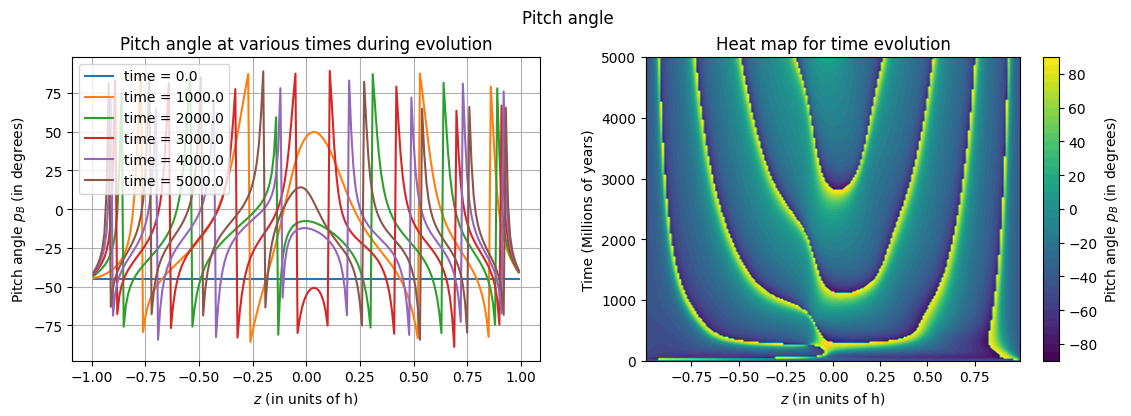

In [17]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Pitch angle at various times during evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Heat map for time evolution')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Pitch angle')
plt.show()

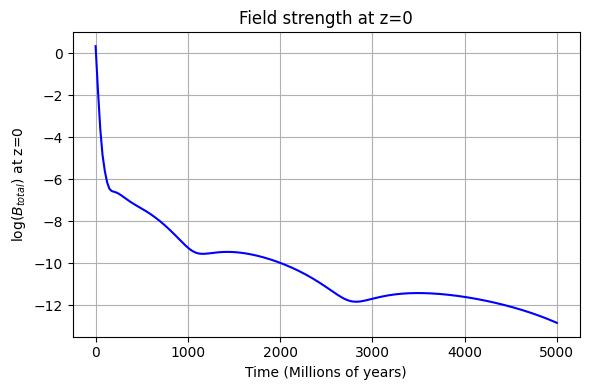

In [18]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - II

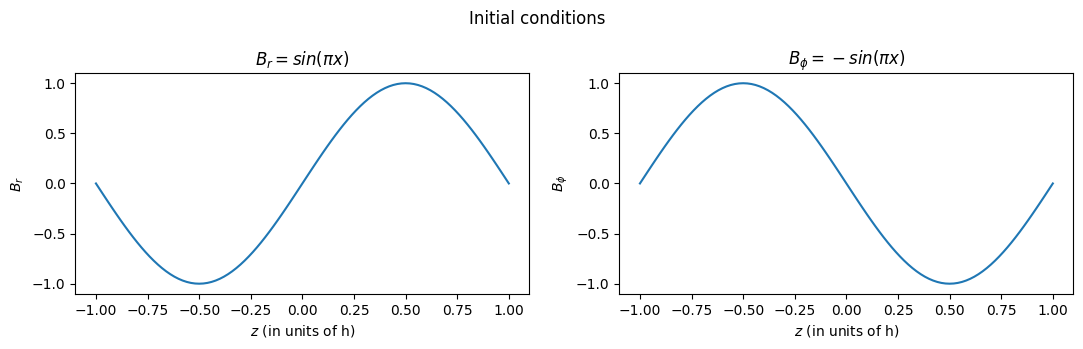

In [19]:
def init_cond_Br(x):
    return np.sin(np.pi*x)

def init_cond_Bphi(x):
    return -np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = sin(\pi x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -sin(\pi x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [20]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

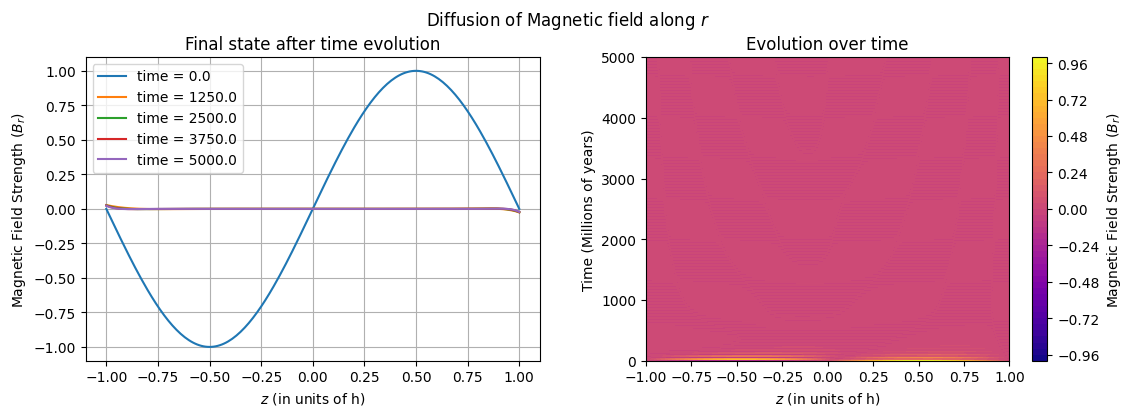

In [21]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

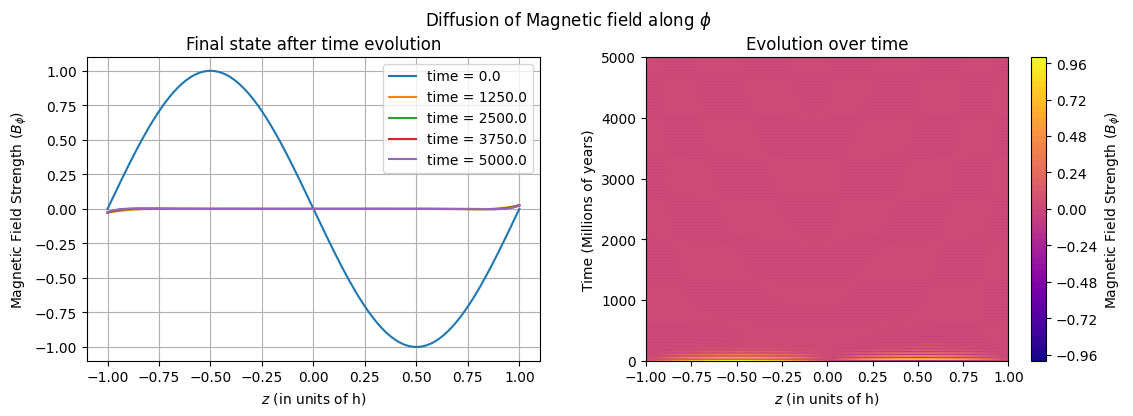

In [22]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

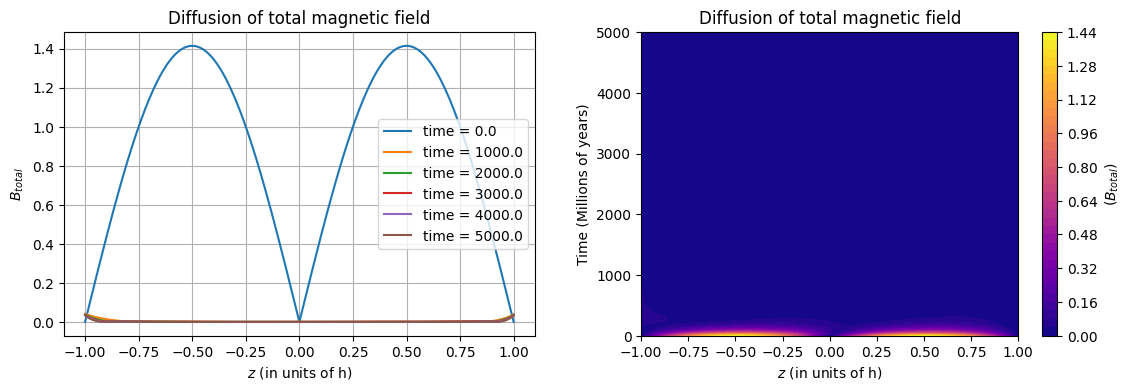

In [23]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

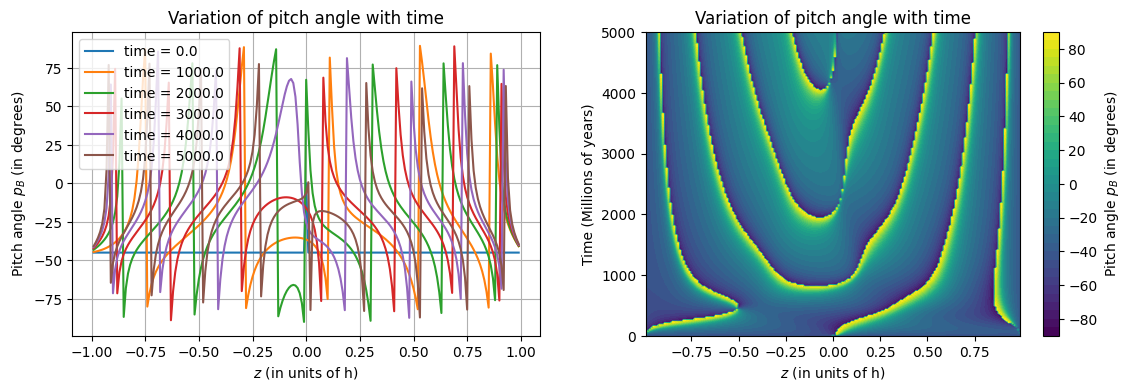

In [24]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

C:\Users\Ratul\AppData\Local\Temp\ipykernel_21844\341676403.py:2: RuntimeWarning: divide by zero encountered in log
  B_mid = np.log(B_total[int(len(z)/2), :])


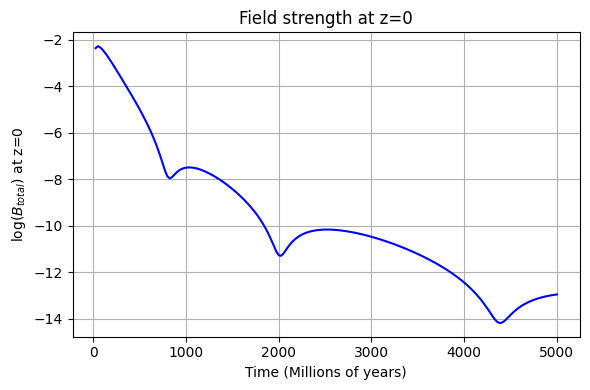

In [25]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - III

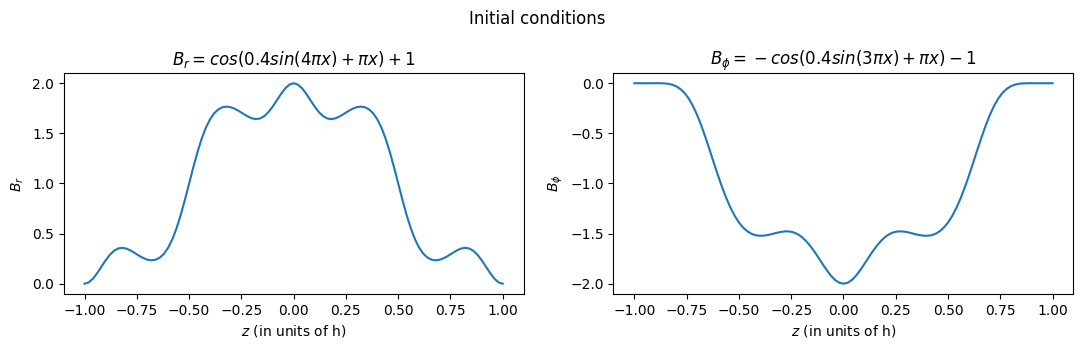

In [26]:
def init_cond_Br(x):
    return np.cos(0.4*np.sin(np.pi*4*(x)) + np.pi*(x))+1

def init_cond_Bphi(x):
    return -np.cos(0.4*np.sin(np.pi*3*(x)) + np.pi*(x))-1

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(0.4sin(4\pi x) + \pi x) + 1$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(0.4sin(3\pi x) + \pi x) - 1$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [27]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

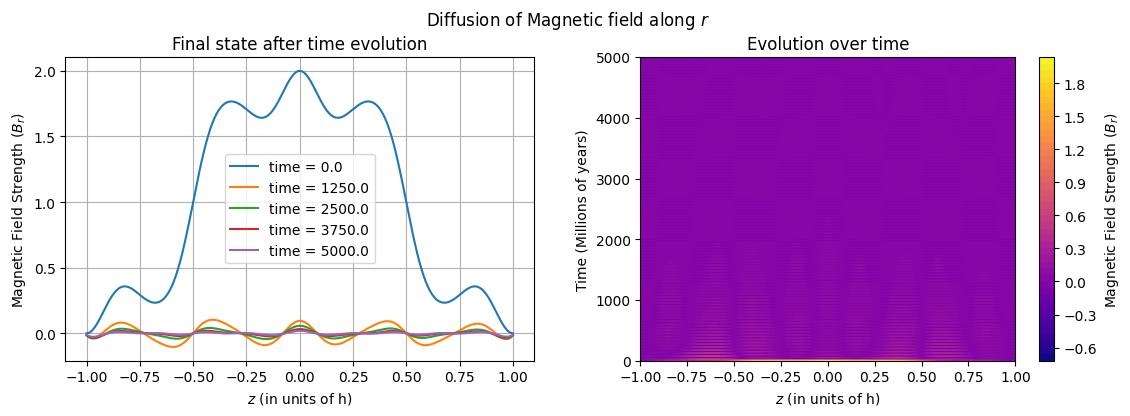

In [28]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

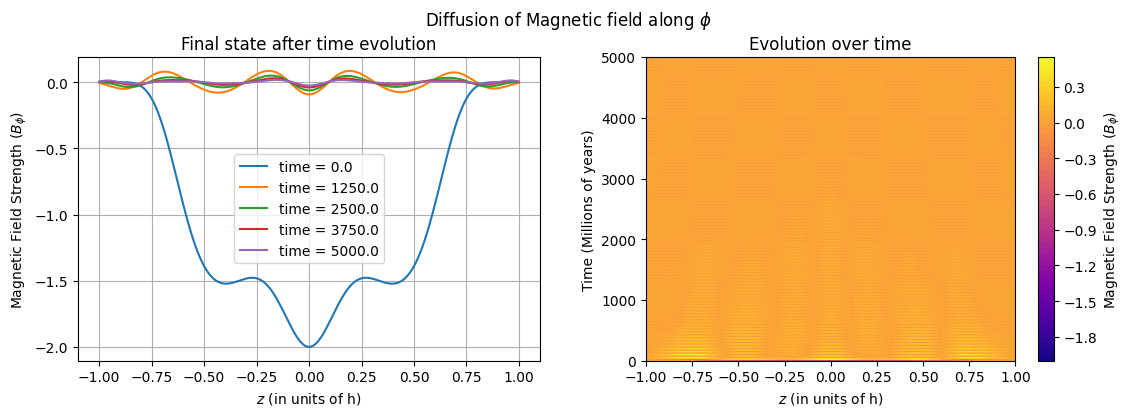

In [29]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

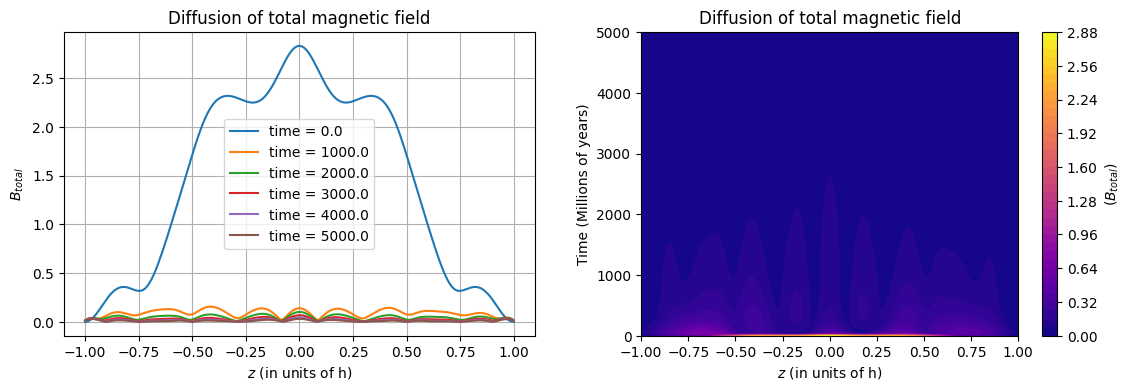

In [30]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

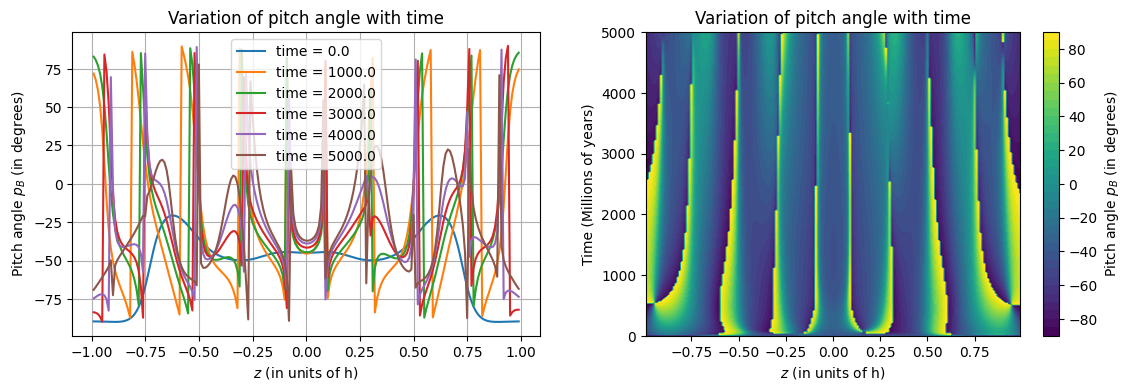

In [31]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

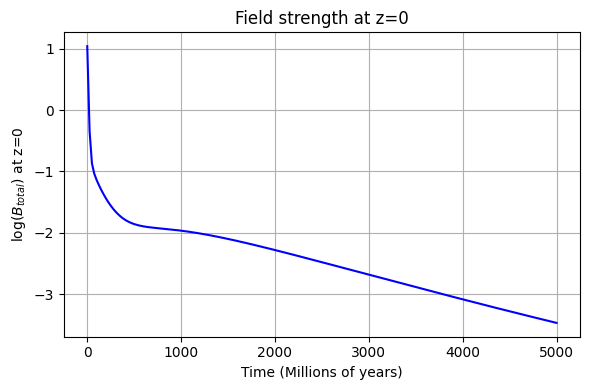

In [32]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Case for D = -10

We try setting D = -10

In [33]:
alpha = 4e-1    # constant for alpha effect
q = 1e-1         # q value
Omega = 4e-1     # constant for omega effect

D = - (alpha*q*Omega*h**3)/eta_T**2
print('Thus, value of dynamo number D for ' + r'$\alpha = $' + str(alpha) + ', ' + r'$q = $' + str(q) + ', and ' + r'$\Omega = $' + str(Omega) + ' is')
print('D = ' + str(D))

Thus, value of dynamo number D for $\alpha = $0.4, $q = $0.1, and $\Omega = $0.4 is
D = -10.000000000000002


# Initial Conditions - I

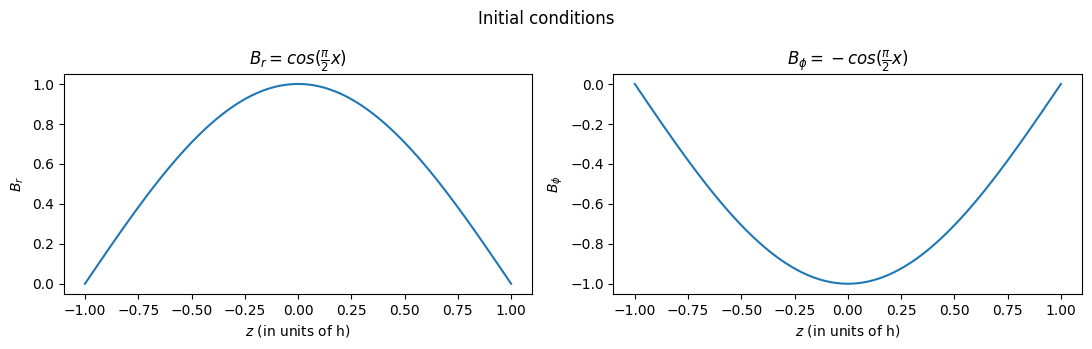

In [34]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [35]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

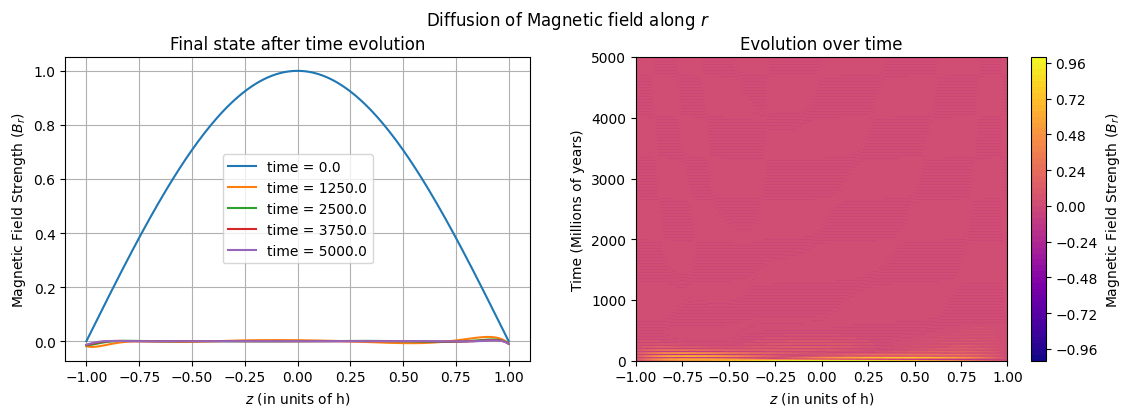

In [36]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

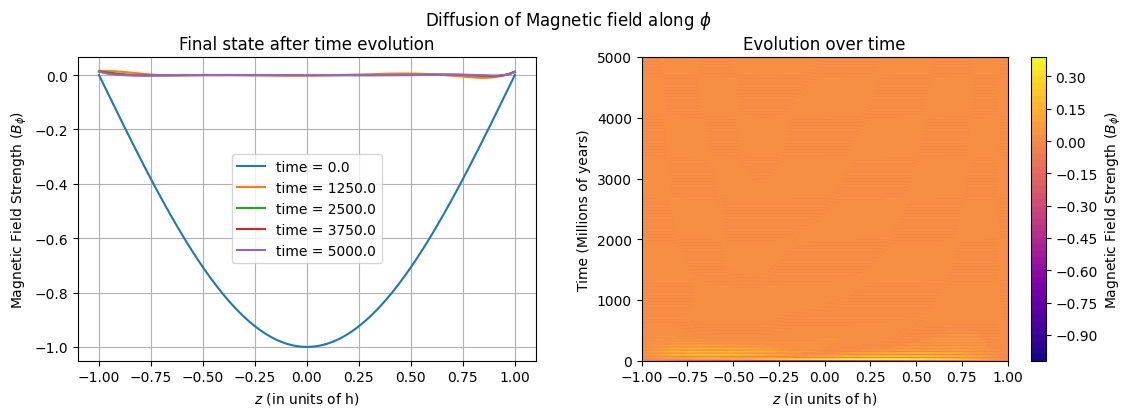

In [37]:
plt.figure(figsize=(12, 8))

# Final state plot
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Evolution plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

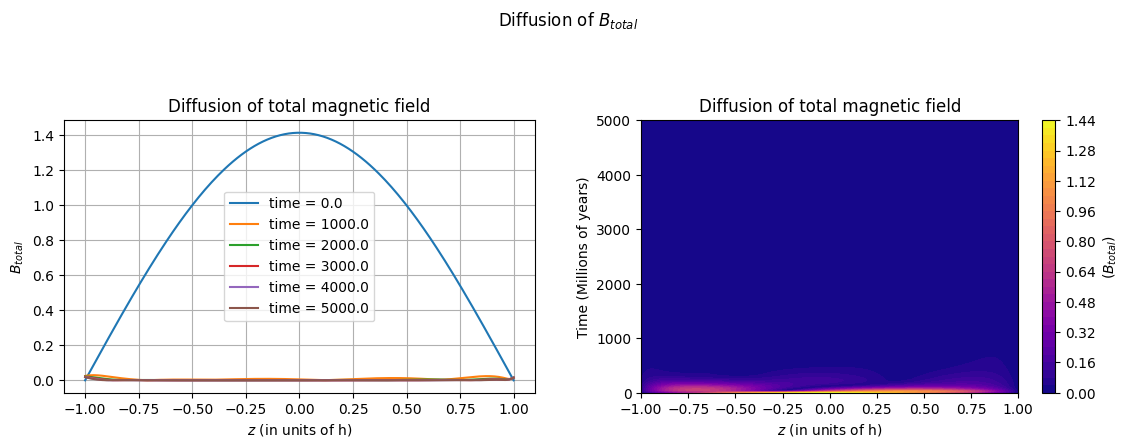

In [38]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot for total magnetic field
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Plot for pitch angle
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title('Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.suptitle('Diffusion of ' + r'$B_{total}$')

plt.tight_layout(pad=3)

plt.show()

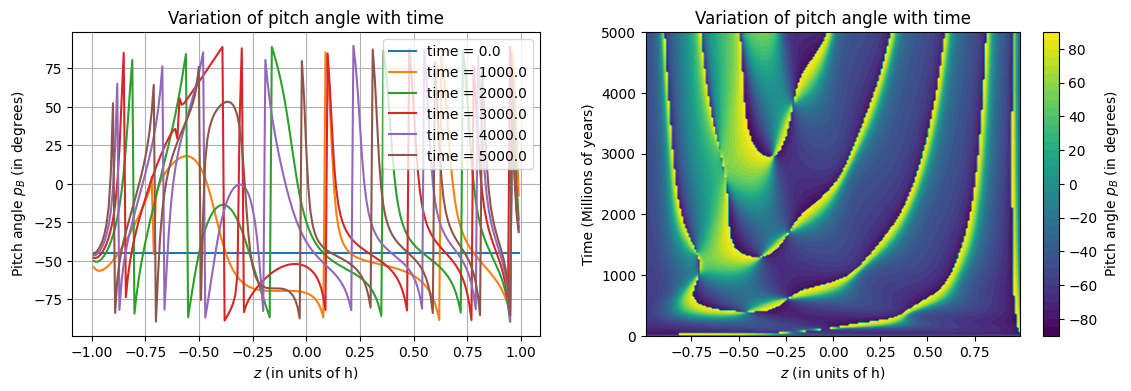

In [39]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

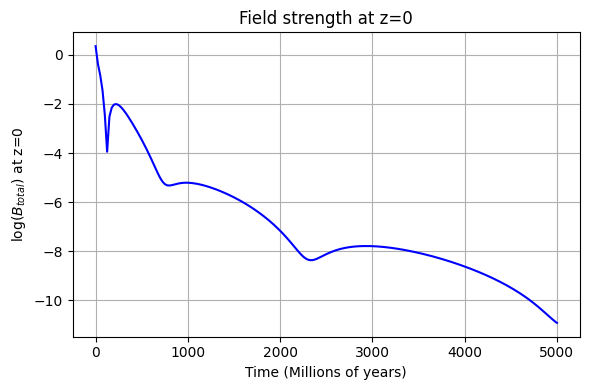

In [40]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - II

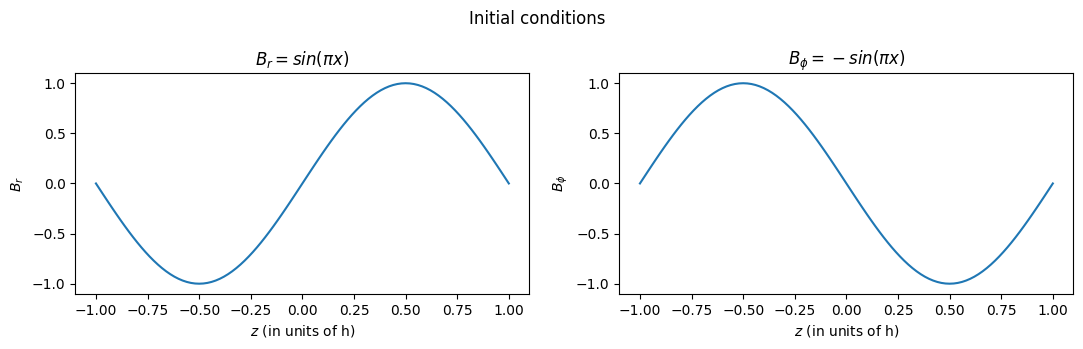

In [41]:
def init_cond_Br(x):
    return np.sin(np.pi*x)

def init_cond_Bphi(x):
    return -np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = sin(\pi x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -sin(\pi x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [42]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

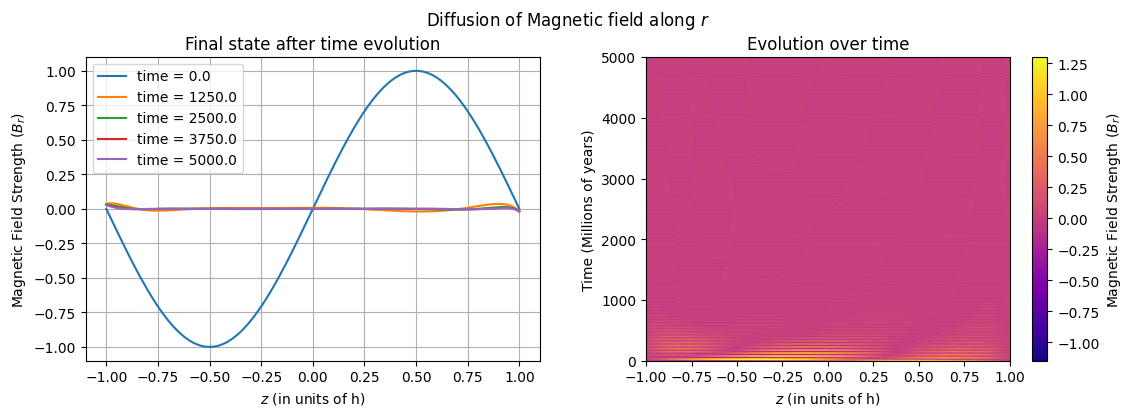

In [43]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

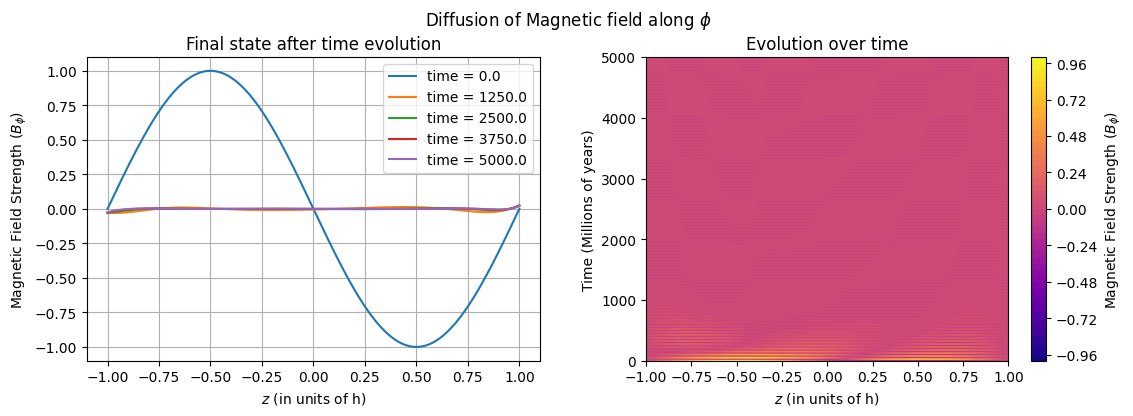

In [44]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

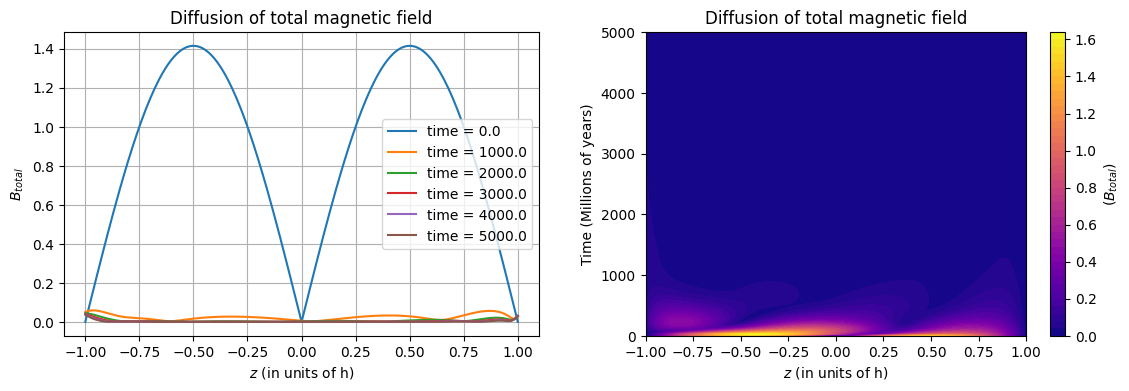

In [45]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

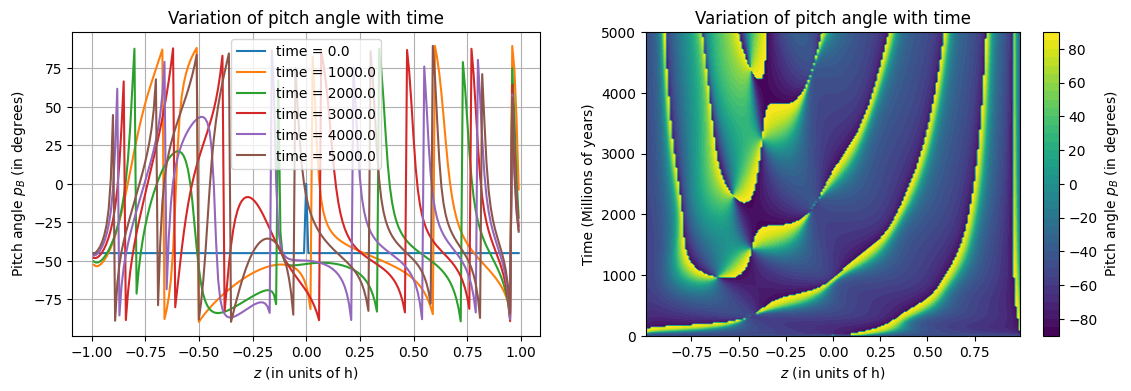

In [46]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

C:\Users\Ratul\AppData\Local\Temp\ipykernel_21844\341676403.py:2: RuntimeWarning: divide by zero encountered in log
  B_mid = np.log(B_total[int(len(z)/2), :])


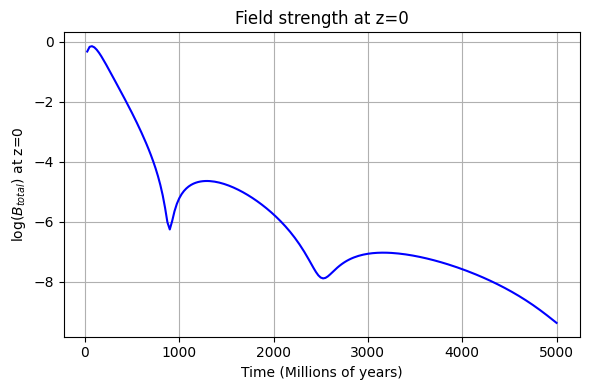

In [47]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - III

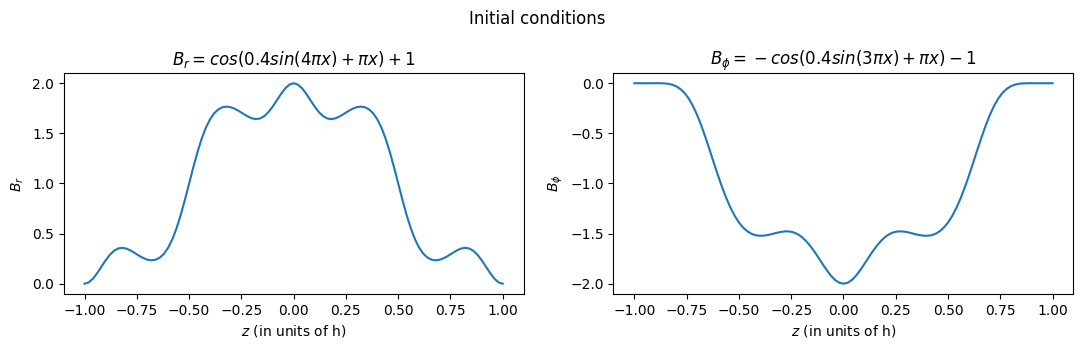

In [48]:
def init_cond_Br(x):
    return np.cos(0.4*np.sin(np.pi*4*(x)) + np.pi*(x))+1

def init_cond_Bphi(x):
    return -np.cos(0.4*np.sin(np.pi*3*(x)) + np.pi*(x))-1

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(0.4sin(4\pi x) + \pi x) + 1$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(0.4sin(3\pi x) + \pi x) - 1$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [49]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

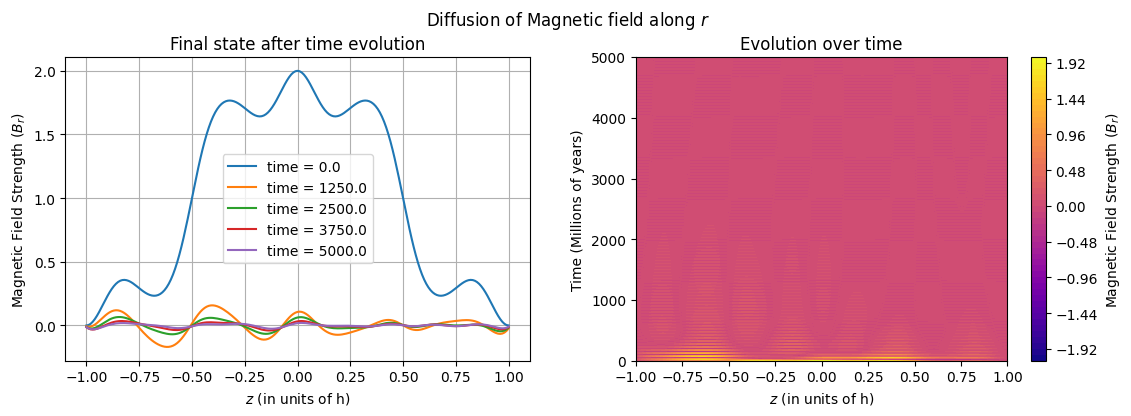

In [50]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

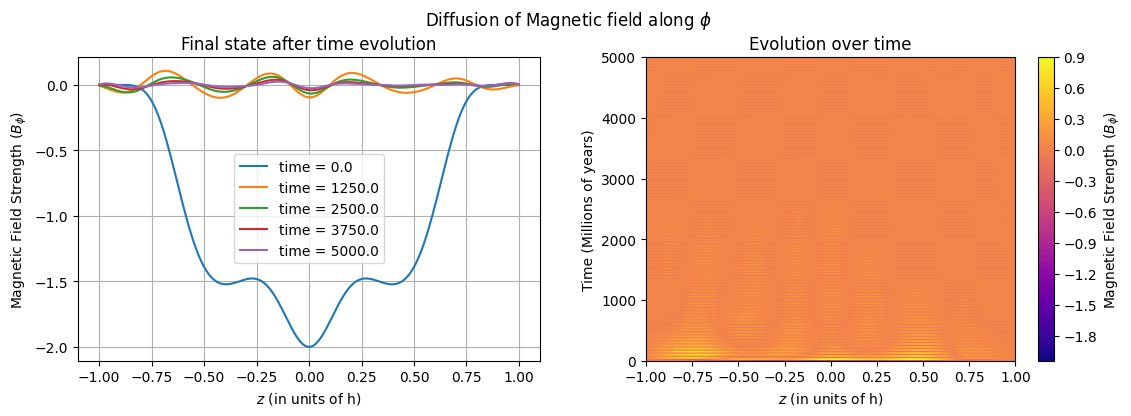

In [51]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

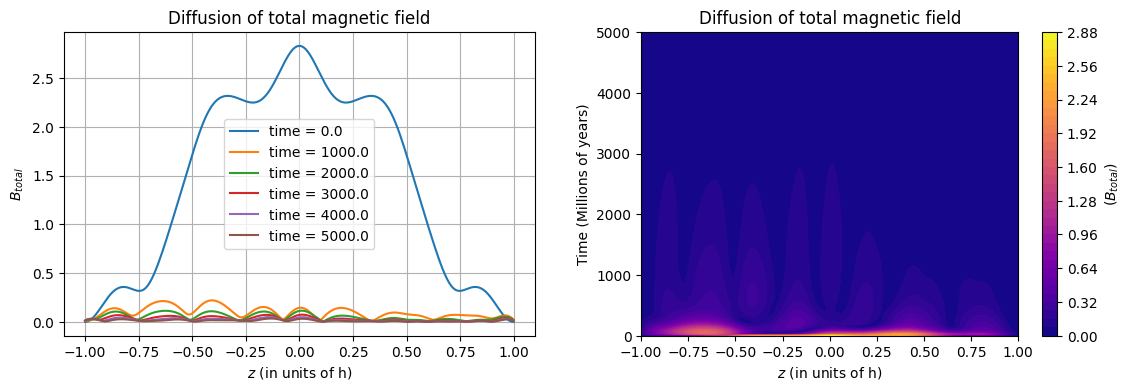

In [52]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

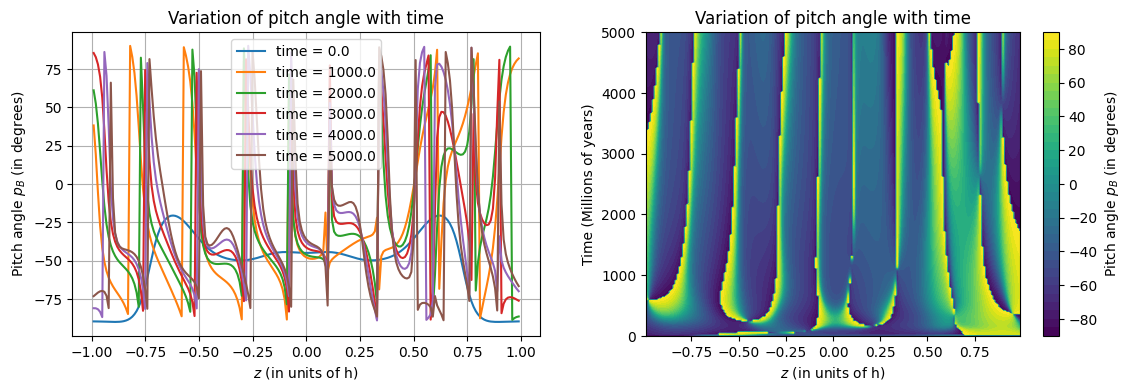

In [53]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

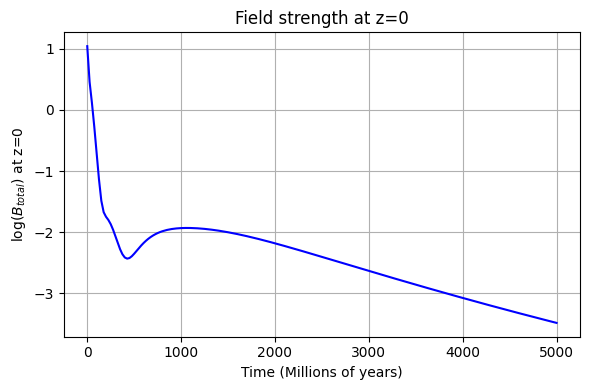

In [54]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Case for D = -250

Now, we set D = -250 for the 3 seed fields and examine our results

In [55]:
alpha = 1e1    # constant for alpha effect
q = 1e-1         # q value
Omega = 4e-1     # constant for omega effect

D = - (alpha*q*Omega*h**3)/eta_T**2
print('Thus, value of dynamo number D for ' + r'$\alpha = $' + str(alpha) + ', ' + r'$q = $' + str(q) + ', and ' + r'$\Omega = $' + str(Omega) + ' is')
print('D = ' + str(D))

Thus, value of dynamo number D for $\alpha = $10.0, $q = $0.1, and $\Omega = $0.4 is
D = -250.0


# Initial Conditions - I

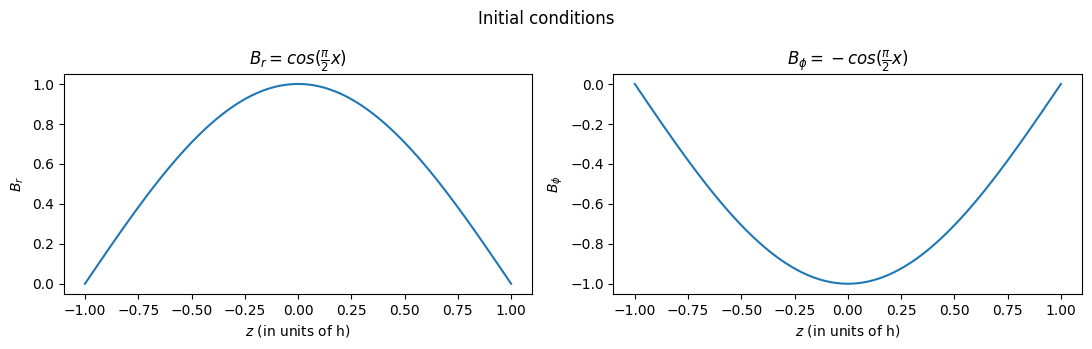

In [56]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [57]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

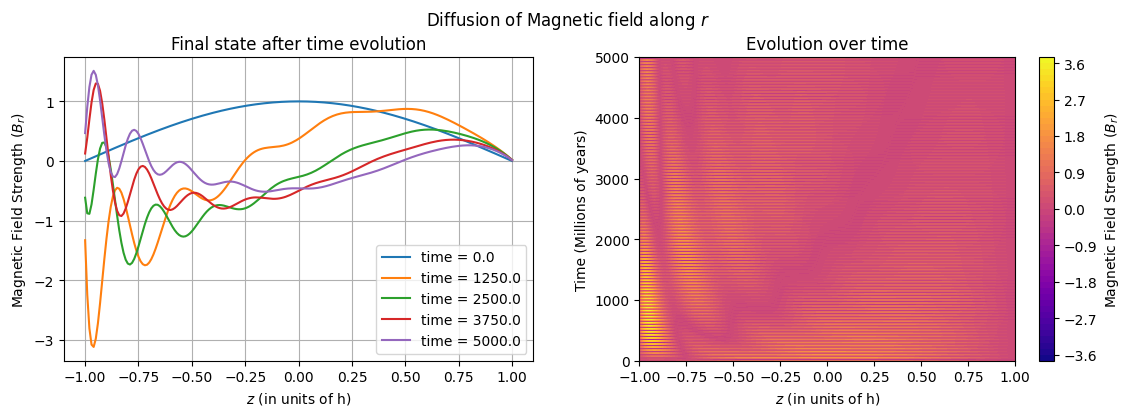

In [58]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

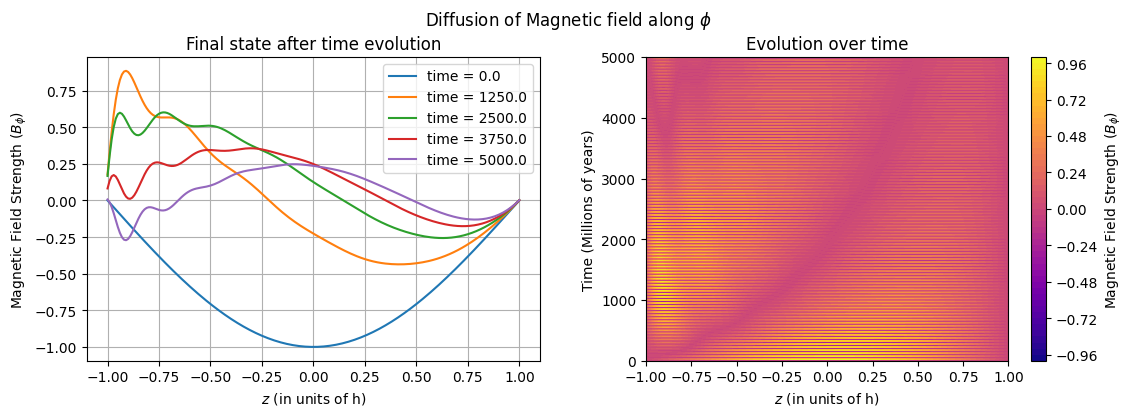

In [59]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

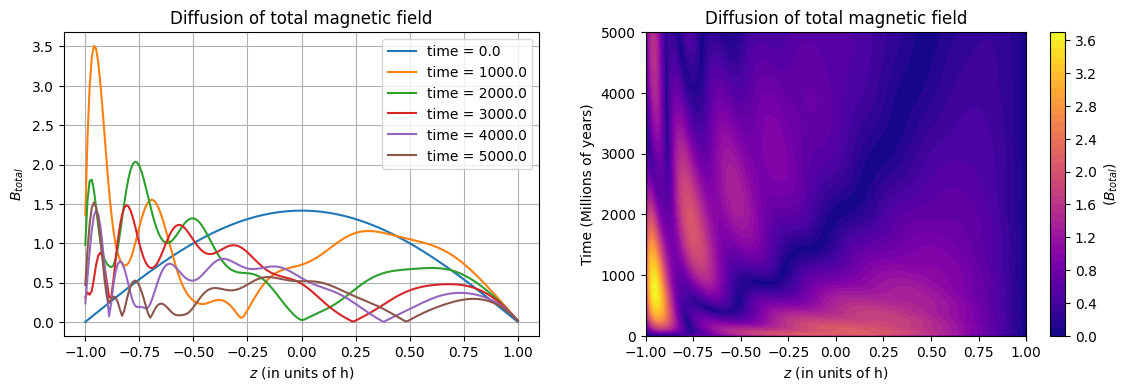

In [60]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

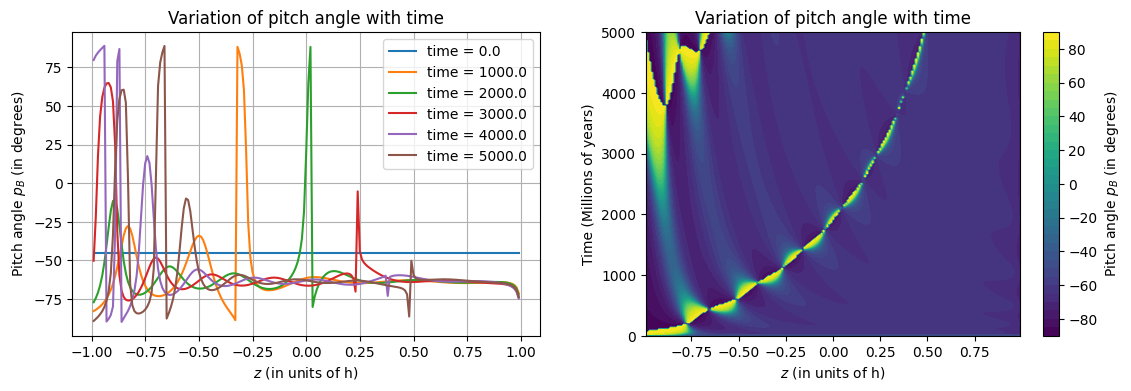

In [61]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

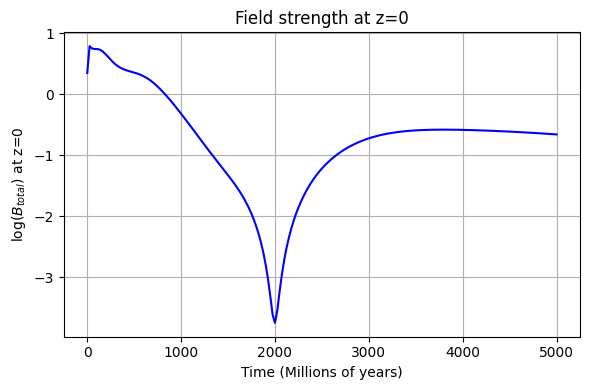

In [62]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - II

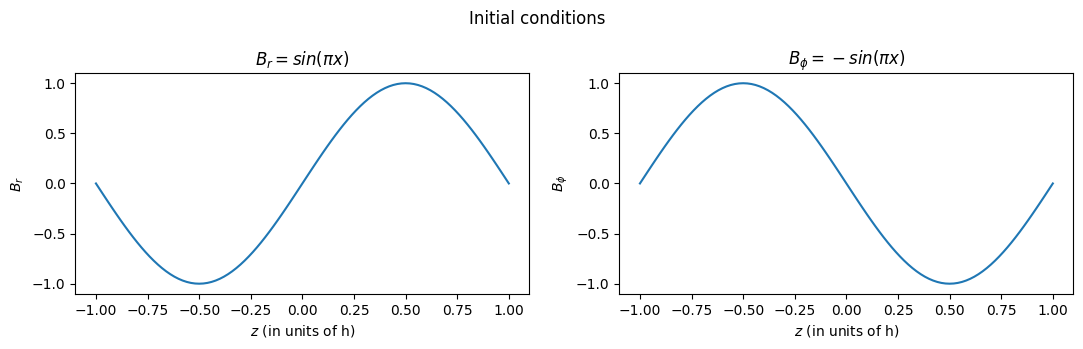

In [63]:
def init_cond_Br(x):
    return np.sin(np.pi*x)

def init_cond_Bphi(x):
    return -np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = sin(\pi x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -sin(\pi x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [64]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

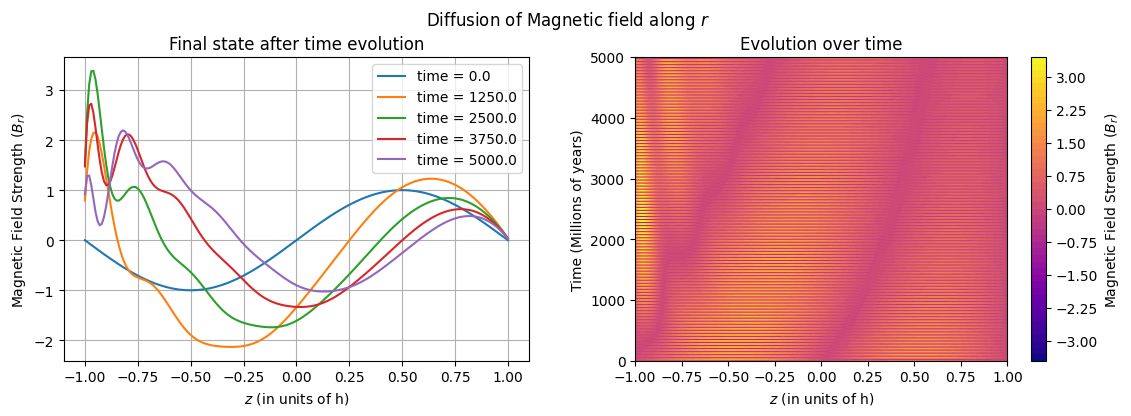

In [65]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

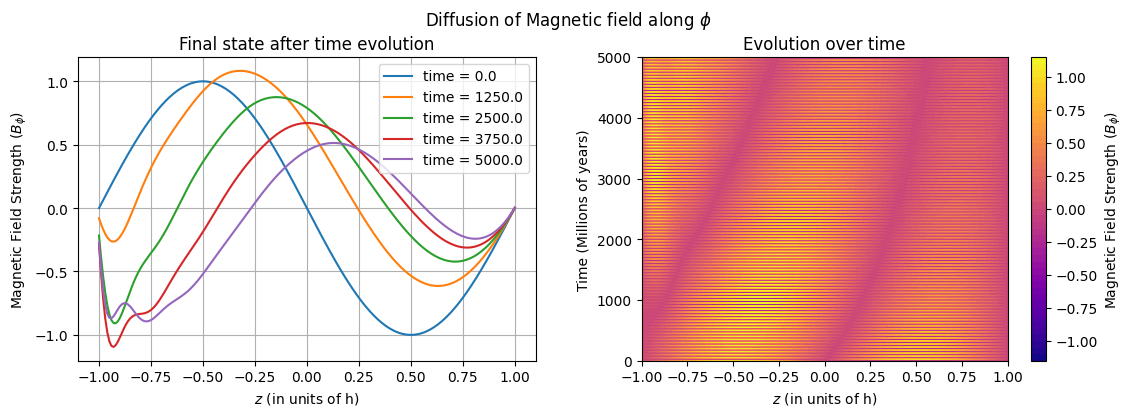

In [66]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

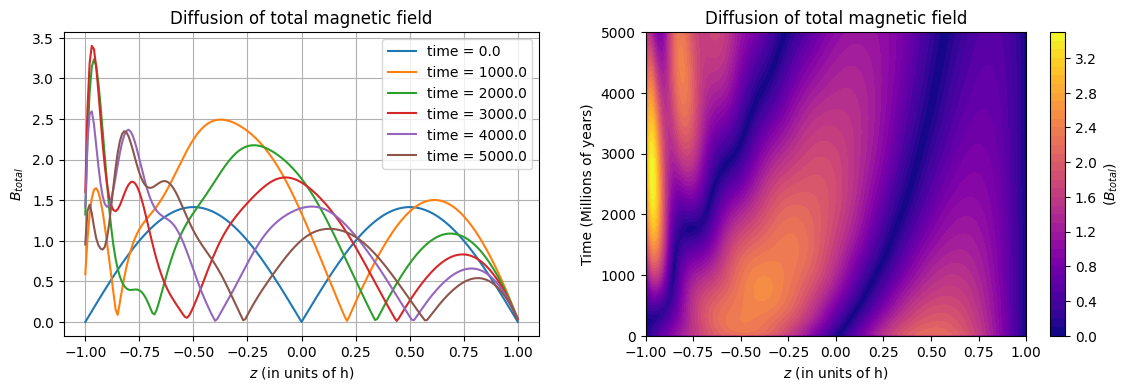

In [67]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

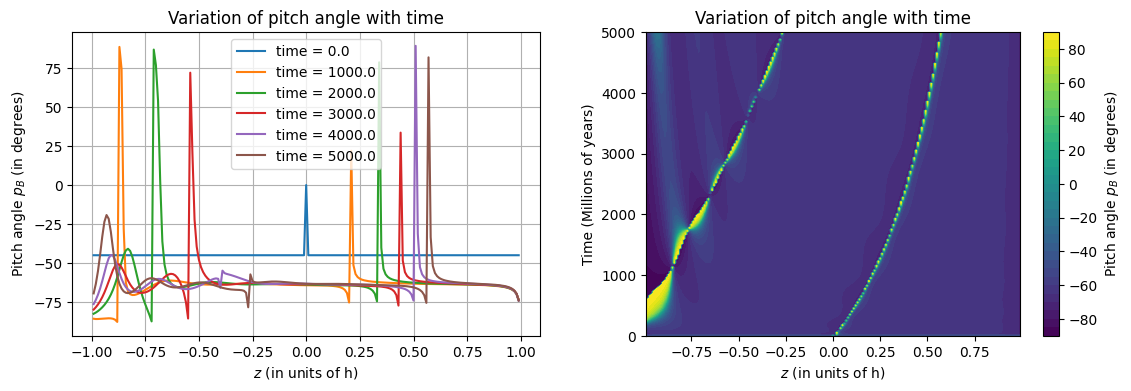

In [68]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

C:\Users\Ratul\AppData\Local\Temp\ipykernel_21844\341676403.py:2: RuntimeWarning: divide by zero encountered in log
  B_mid = np.log(B_total[int(len(z)/2), :])


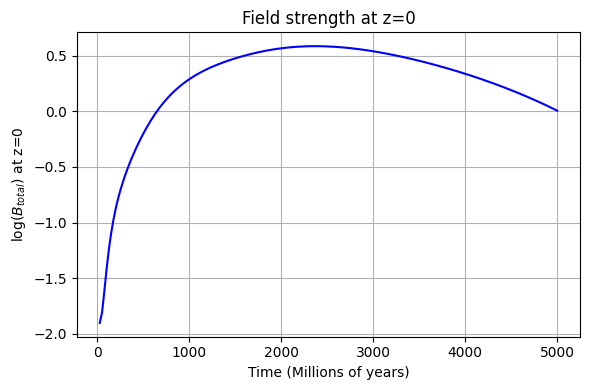

In [69]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Initial Conditions - III

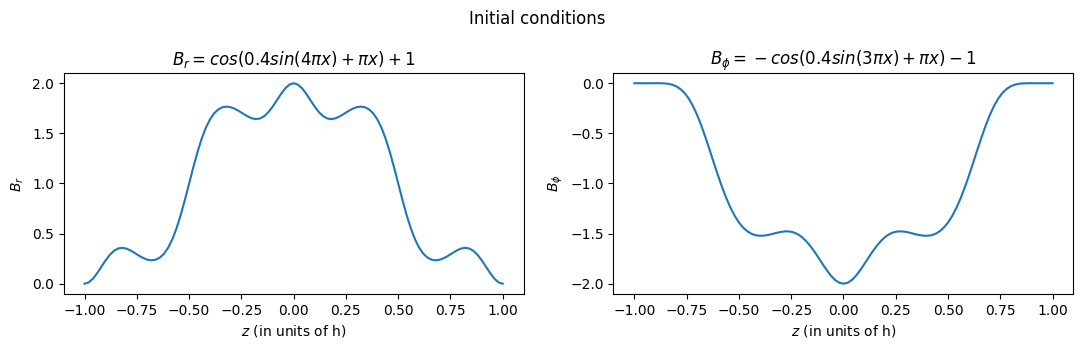

In [70]:
def init_cond_Br(x):
    return np.cos(0.4*np.sin(np.pi*4*(x)) + np.pi*(x))+1

def init_cond_Bphi(x):
    return -np.cos(0.4*np.sin(np.pi*3*(x)) + np.pi*(x))-1

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(0.4sin(4\pi x) + \pi x) + 1$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(0.4sin(3\pi x) + \pi x) - 1$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [71]:
# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = soln[:len(z), :]
B_phi = soln[len(z):, :]

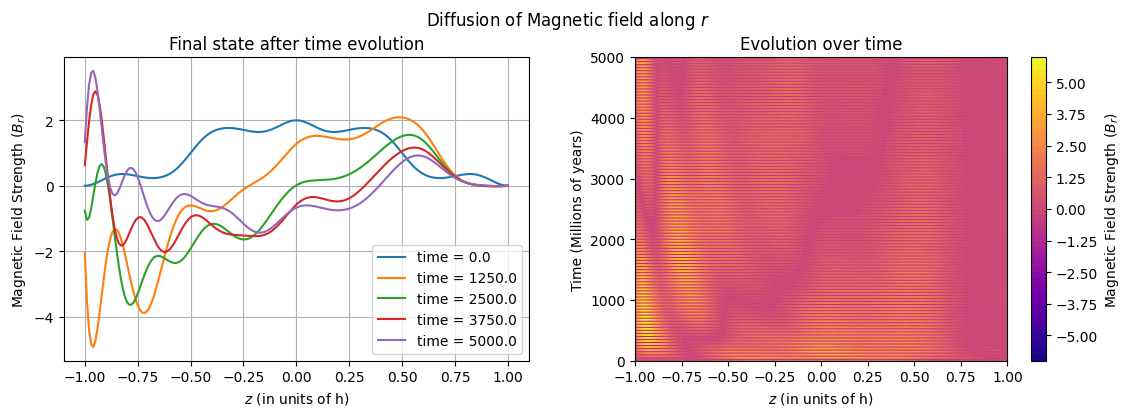

In [72]:
# Plot the solution

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_r[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_r$)')
plt.title('Final state after time evolution')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_r.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_r$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$r$')

plt.show()

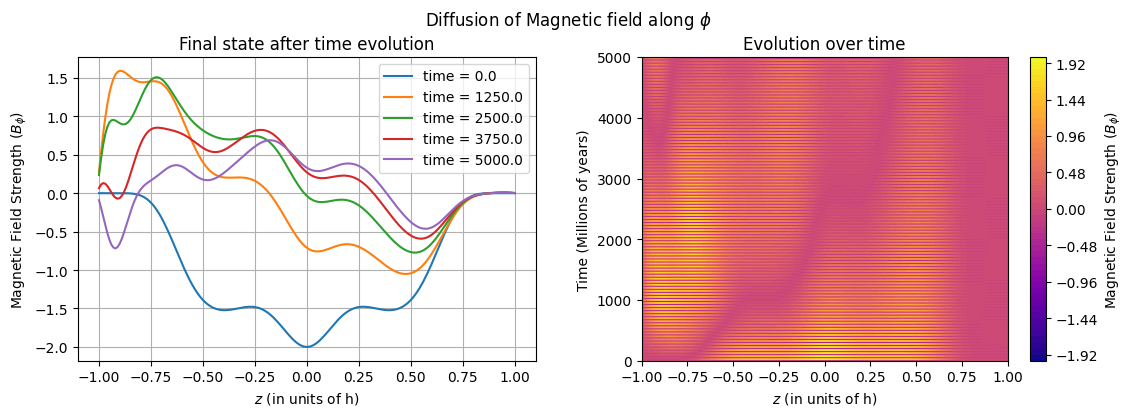

In [73]:
plt.figure(figsize=(12, 8))

# Create 2D plots
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/4))):
    plt.plot(z, B_phi[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Magnetic Field Strength ($B_\phi$)')
plt.title('Final state after time evolution')
# plt.ylim(np.min(solution_phi), np.max(solution_phi))
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_phi.T, 50, cmap='plasma')
plt.colorbar(label=r'Magnetic Field Strength ($B_\phi$)')
plt.title(r'Evolution over time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')
plt.tight_layout(pad=3)

plt.suptitle('Diffusion of Magnetic field along ' + r'$\phi$')

plt.show()

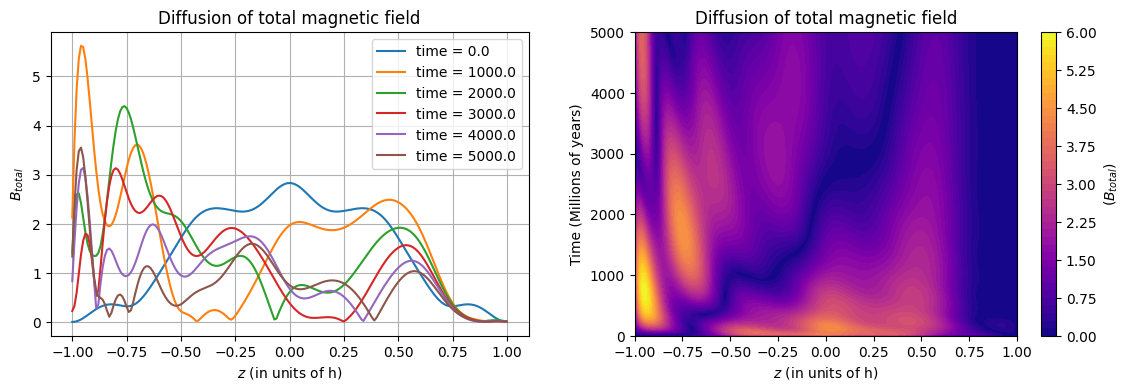

In [74]:
B_total, pitch = ml.BP_calc(B_r, B_phi)

# Plot the total magnetic field and the pitch angle

# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z, B_total[:, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{total}$')
plt.title('Diffusion of total magnetic field')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z, t), B_total.T, 40, cmap='plasma')
plt.colorbar(label=r'($B_{total}$)')
plt.title(r'Diffusion of total magnetic field')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

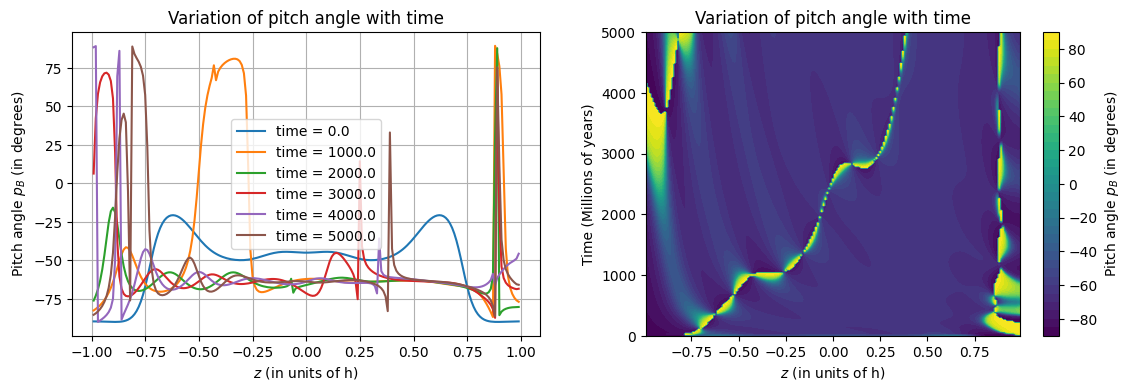

In [75]:
# Create 2D plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for i in (range(0, len(t), int(len(t)/5))):
    plt.plot(z[1:-1], pitch[1:-1, i], label=f'time = {t[i]:.1f}')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'Pitch angle $p_B$ (in degrees)')
plt.title(r'Variation of pitch angle with time')
plt.grid()
plt.legend()

# Create imshow plot
plt.subplot(2, 2, 2)
plt.contourf(*np.meshgrid(z[1:-1], t), pitch.T[:, 1:-1], 40, cmap='viridis')
plt.colorbar(label=r'Pitch angle $p_B$ (in degrees)')
plt.title('Variation of pitch angle with time')
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel('Time (Millions of years)')

plt.tight_layout(pad=3)

plt.show()

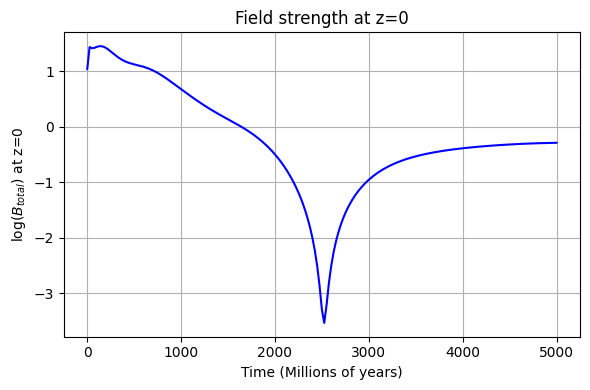

In [76]:
# Decay plot for magnetic field at z=0
B_mid = np.log(B_total[int(len(z)/2), :])
#m, c = np.polyfit(t[-50:], B_mid[-50:], 1)

plt.figure(figsize=(6, 4))
plt.plot(t, B_mid, 'b-')
# plot another line with the slope and intercept m and c
#plt.plot(t[-50:], m*t[-50:] + c, 'r:', linewidth=3, label=r'Slope ($\gamma$) = {:.3e}'.format(m))
plt.xlabel('Time (Millions of years)')
plt.ylabel('log$(B_{total})$ at z=0')
plt.title(r'Field strength at z=0')
plt.grid()
#plt.legend()
plt.tight_layout()

plt.show()

# Critical dynamo number finder

Wherein, the critical dynamo number is found by an exercise of the humblest root finding method 

In [77]:
alpha_array = np.linspace(4e-3, 4e1, 100)
q = 0.1         # q value
Omega = 0.4     # constant for omega effect

D_array = -(alpha_array*q*Omega*h**3)/eta_T**2

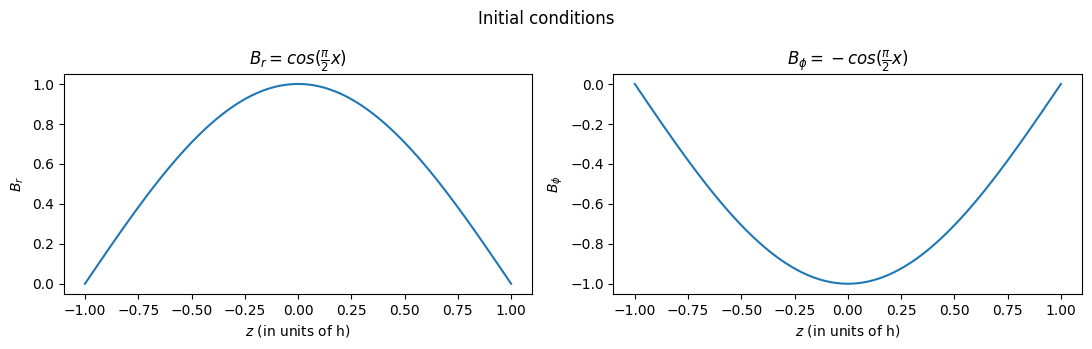

In [78]:
def init_cond_Br(x):
    return np.cos(np.pi/2*x)

def init_cond_Bphi(x):
    return -np.cos(np.pi/2*x)

def source_term(x, t):
    return 0

z = np.linspace(-h, h, 101)

plt.figure(figsize=(11, 3.5))
plt.subplot(121)
plt.plot(z, init_cond_Br(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_r$')
plt.title(r'$B_r = cos(\frac{\pi}{2}x)$')

plt.subplot(122)
plt.plot(z, init_cond_Bphi(z))
plt.xlabel(r'$z$ (in units of h)')
plt.ylabel(r'$B_{\phi}$')
plt.title(r'$B_\phi = -cos(\frac{\pi}{2}x)$')

plt.suptitle('Initial conditions')
plt.tight_layout(pad=1)

plt.show()

In [79]:
#m_array = np.zeros(len(alpha_array))
m_array = []

for alpha in alpha_array:
    # Spatial grid
    z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
    t = np.linspace(0, t_max, int(t_max / dt) + 1)

    # Coefficients for the matrix A and B
    rho = eta_T*dt/(2*dz**2)
    sigma = alpha*dt/(2*dz)

    A = ml.matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
    B = ml.matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

    # Solve the diffusion equation in radial direction
    soln = ml.CN_alpha_omega(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

    B_r = soln[:len(z), :]
    B_phi = soln[len(z):, :]

    B_total, pitch = ml.BP_calc(B_r, B_phi)

    B_mid = np.log(B_total[int(len(z)/2), :])

    m, c = np.polyfit(t[-500:], B_mid[-500:], 1)

    m_array.append(m)

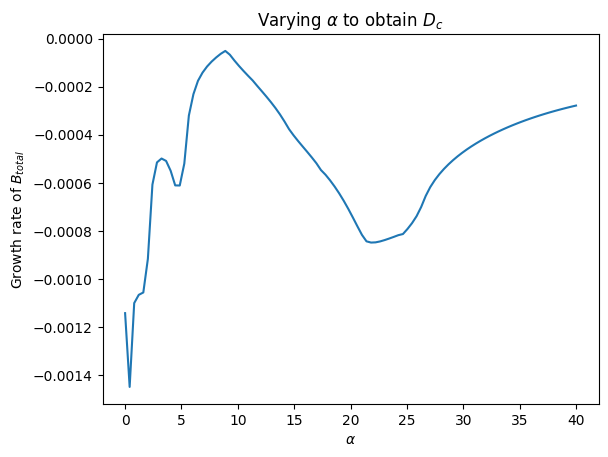

In [80]:
plt.plot(alpha_array, m_array)
plt.xlabel(r'$\alpha$')
plt.ylabel('Growth rate of ' + r'$B_{total}$')
plt.title('Varying ' + r'$\alpha$' + ' to obtain ' + r'$D_c$')
plt.show()

In [81]:
critical_growth_rate = max(m_array)
print(critical_growth_rate)
crit_index = m_array.index(critical_growth_rate)
print(crit_index)
print(alpha_array[crit_index])

-5.118757793382761e-05
22
8.892


In [82]:
alpha = alpha_array[crit_index]    # we set alpha as that which corresponds to D_c
q = 1e-1                           # q value
Omega = 4e-1                       # constant for omega effect

D = - (alpha*q*Omega*h**3)/eta_T**2
print('Thus, the critical dynamo number is')
print('D = ' + str(D))

Thus, the critical dynamo number is
D = -222.29999999999998
